In [1]:
import sys

assert sys.version_info >= (3, 7)

In [2]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [3]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [4]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "training_linear_models"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# 4.1 선형회귀
* 정의
    - 어떤 데이터가 있을 때, 그 데이터의 관계를 직선으로 그려서 예측하는 방법
* 목적
    - 선형 회귀의 목적은 주어진 데이터에 가장 잘 맞는 직선을 찾는 것입니다. 이를 위해 우리는 데이터 포인트와 해당 직선 사이의 오차를 최소화하려고 합니다. 가장 일반적으로 사용되는 오차 최소화 방법은 **최소제곱법(Ordinary Least Squares, OLS)**으로, 이는 잔차 제곱합(Residual Sum of Squares, RSS)을 최소화하는 계수들을 찾습니다.


$$\hat{y} = \theta_0 + \theta_1x_1 + \theta_2x_2 + ⋅⋅⋅⋅⋅⋅ +\theta_nx_n$$
* $\hat{y}$은 예측값입니다.
* $n$은 특성의 수입니다.
* $x_i$는 $i$번째 특성값입니다.
* $\theta_j$는 $j$번째 모델 파라미터입니다(편향$\theta_0$과 특성의 가중치 $\theta_1, \theta_2, \theta_3, ⋅⋅⋅⋅⋅, \theta_n$)

위의 식은 벡터 형태로 더 간단히 쓸 수 있다.
$$\hat{y} = h_Θ(X) = Θ \cdot X$$
* $h_Θ$는 모델 파라미터 $Θ$를 사용한 가설 함수입니다.
* Θ는 편향 $\theta_0$과 $\theta_1$에서 $\theta_n$까지의 특성 가중치를 담은 모델의 파라미터 벡터입니다.
* $X$는 $x_0$에서 $x_n$까지 담은 샘플의 **특성벡터**입니다. $x_0$은 항상 1이다.
* $Θ \cdot X$는 벡터 $\theta$와 $X$의 점곱입니다. $\theta_0x_0 + \theta_1x_1 + \cdot\cdot\cdot\cdot + \theta_nx_n$과 같다.
    * 점곱은 두 벡터의 대응되는 원소들을 곱한 후 그 합을 구하는 방식으로 계산


모델을 훈련시킨다는 것은 모델이 훈련 세트에 가장 잘 맞도록 모델 파라미터를 설정하는 것이다.
<br>
이를 위해 먼저 모델이 훈련 데이터에 얼마나 잘 들어맞는지 측정해야한다.
<br>
회귀에서 가장 널리 사용되는 성능 측정 지표는 평균 제곱근 오차(RMSE)이다. (2장 내용 참고)
<br>
선형 회귀 모델을 훈련시키려면 RMSE를 최소화하는 $\theta$를 찾아야한다.
<br>
실제로는 RMSE보다 평균 제곱 오차(MSE)를 최소화하는 것이 같은 결과를 내면서 더 간단하다.


훈련 세트 X데 대한 선형 회귀 가설 $h_\theta$의 MSE의 식:
$$\text{MSE}(X, h_\theta) = \frac {1} {m} \sum_{i=1}^{m}(Θ^TX^{(i)} - y^{(i)})^2$$

2장에서 공부할 때 표기법:
$$\text{MSE}(X, h_\theta) = \frac {1} {m} \sum_{i=1}^{m}(y_i - y^{(i)})^2$$
간단히 표기하기 위해서 $MSE(Θ)$라고 쓰겠다.

### 4.1.1 정규 방정식
* 정의
    - 선형 회귀 모델에서 최적의 직선(혹은 평면)을 찾기 위한 간단한 수학 공식입니다. 선형 회귀는 데이터의 관계를 직선으로 표현하는 방법으로, 이 직선의 기울기와 절편을 어떻게 계산할지 결정하는 데 정규 방정식이 사용됩니다.

비용 함수를 최소화하는 $\theta$값을 찾기 위한 **해석적인 방법**이 있다.
<br>
다른 말로 하면 결과를 바로 얻을 수 있는 수학 공식 이를 **정규 방정식** 이라고 한다.
<br>

**해석적인 방법**의 공식 == **정규 방정식**:
$$\hat \theta = (X^TX)^{-1}X^TY$$
* $\hat \theta$은 비용 함수를 최소화하는 $\theta$ 값입니다.
* $Y$는 $y^{(1)}$부터 $y^{(m)}$까지 포함하는 타깃 벡터입니다.

In [6]:
import numpy as np

# 선형처럼 보이는 데이터
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1)
# 이 데이터를 생성하기 위해 사용한 함수는 y = 4 +3x_1 + 가우스_잡음 이다.
y = 4 + 3 * X + np.random.randn(m, 1)

# 정규방정식을 사용해 \hat \theta를 계산해본다.
# 데이터 배열에 더미 특성(dummy feature)을 추가하는 데 사용됩니다.
# 더미 특성은 일반적으로 값이 1로 채워진 새로운 열을 의미합니다.
# 이 기능은 선형 모델에서 절편(intercept)을 나타내기 위해 유용하게 사용됩니다.
from sklearn.preprocessing import add_dummy_feature
# 만약 더미 특성을 추가하지 않는다면, 모델은 절편 없이 기울기만 학습하게 되어, 데이터가 원점을 지나야 한다는 부정확한 가정을 하게 됩니다.
# 이는 일반적으로 부정확한 모델을 초래할 수 있습니다.
X_b = add_dummy_feature(X)
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

# @ 연산자는 행렬 곱셉을 수행한다.
# 순수 파이썬 배열 = list 에는 사용할 수 없다.

theta_best

array([[4.21509616],
       [2.77011339]])

In [7]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)
X_new_b

array([[1., 0.],
       [1., 2.]])

In [8]:
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

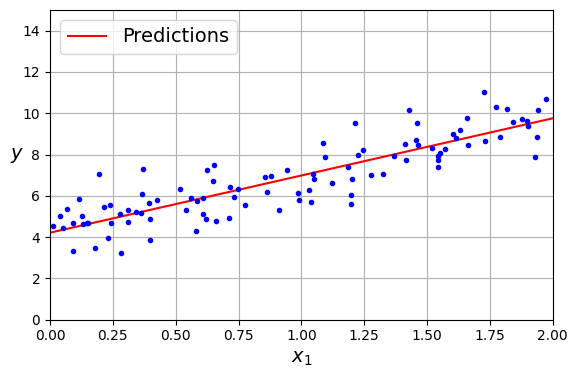

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))  # 추가 코드
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")

# 추가 코드 - 그림 4-2를 꾸미고 저장합니다.
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.legend(loc="upper left")
save_fig("linear_model_predictions_plot")

plt.show()

In [11]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
#  편향(intercept)과 가중치(coef)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [12]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

`LinearRegression` 클래스는 `scipy.linalg.lstsq()` 함수("least squares"의 약자)를 사용하므로 이 함수를 직접 사용할 수 있습니다:

In [13]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

이 함수는 $\mathbf{X}^+\mathbf{y}$을 계산합니다. $\mathbf{X}^{+}$는 $\mathbf{X}$의 _유사역행렬_ (pseudoinverse)입니다(Moore–Penrose 유사역행렬입니다). `np.linalg.pinv()`을 사용해서 유사역행렬을 직접 계산할 수 있습니다:

In [14]:
np.linalg.pinv(X_b) @ y

array([[4.21509616],
       [2.77011339]])